Обязательная часть
Вам необходимо провести базовый EDA выбранного набора данных.

Требования к анализу:

построить не менее 4 визуализаций различных видов;
каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).
Откуда брать данные?

Можете взять свои рабочие данные, либо найти открытые данные (например, на kaggle.com) по интересующей вас предметной области (тогда не забудьте их выложить на github вместе с ноутбуком). Если идей нет, можете взять один из перечисленных ниже:

данные приложений из Google Play;
данные о видео из трендов YouTube;
данные об уровне счастья в разных странах.

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

In [62]:
#для анализа использую последние данные оценки уровня счастья в странах мира за 2019 год
df = pd.read_csv('2019.csv')

In [63]:
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [65]:
df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


Text(0, 0.5, 'Соц уровень')

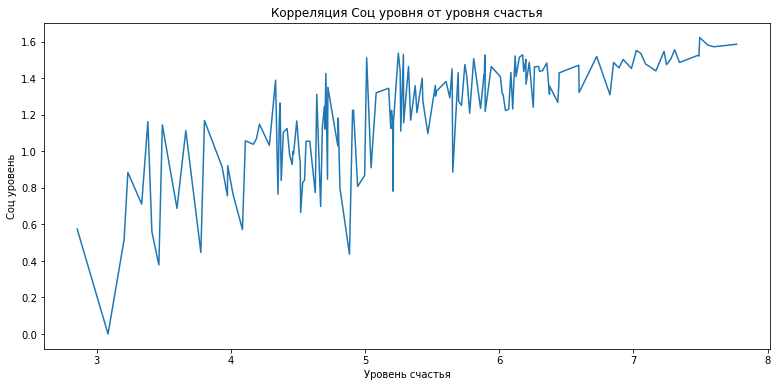

In [67]:
plt.plot(df.Score, df['Social support'])
plt.title('Корреляция Соц уровня от уровня счастья')
plt.xlabel('Уровень счастья')
plt.ylabel('Соц уровень')

график доказывает взаимосвязь Соц уровня от того, насколько счастлив человек. Страны где оценка счастья выше, и соц уровень
там выше

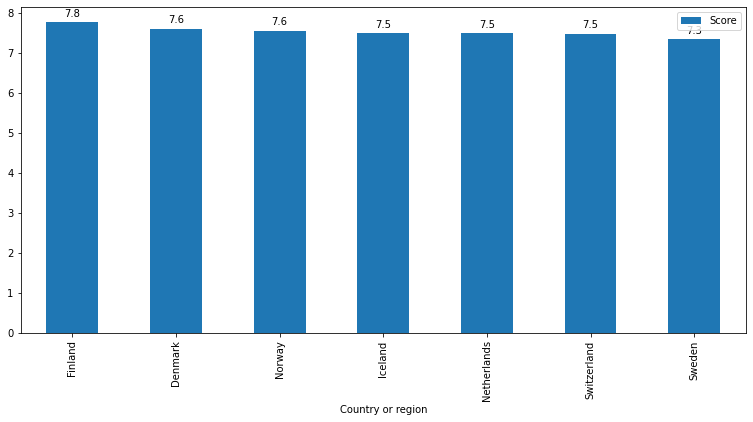

In [68]:
# топ-7 счастливых стран 
top7_country = df[['Score', 'Country or region']].groupby(by='Country or region').sum().sort_values(by='Score',
ascending=False).head(7)
ax = top7_country.plot(kind='bar')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

Топ-7 счастливых стран в мире - Финляндия, Германия, Норвергия, Исландия, Нидерланды, Швейцария, Швеция.
Это все страны Европы, ближе к Северу

<AxesSubplot:title={'center':'Score distrbution'}, ylabel='Frequency'>

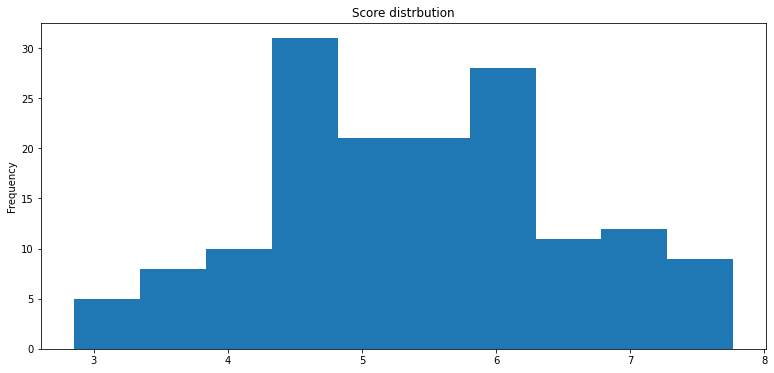

In [59]:
df.Score.plot(kind='hist',
                   title= 'Score distrbution',
                   xlabel= 'Score',
                   ylabel= 'Country')

<AxesSubplot:title={'center':'Social distrbution'}, ylabel='Frequency'>

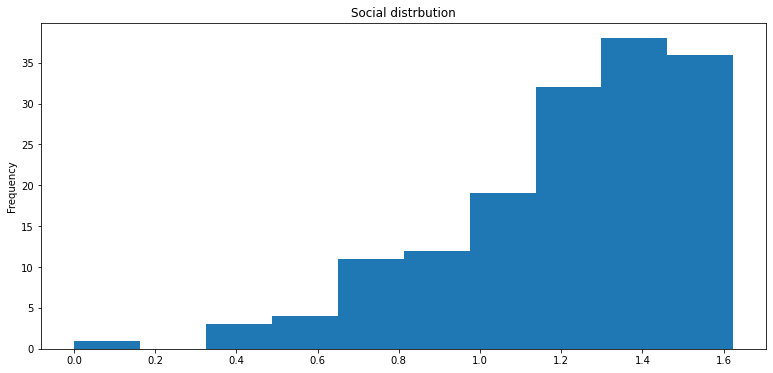

In [76]:
df['Social support'].plot(kind='hist',
                   title= 'Social distrbution',
                   xlabel= 'Social support',
                   ylabel= 'Country')

In [ ]:
Уровень счастья выше там, где социальный уровень становится выше.

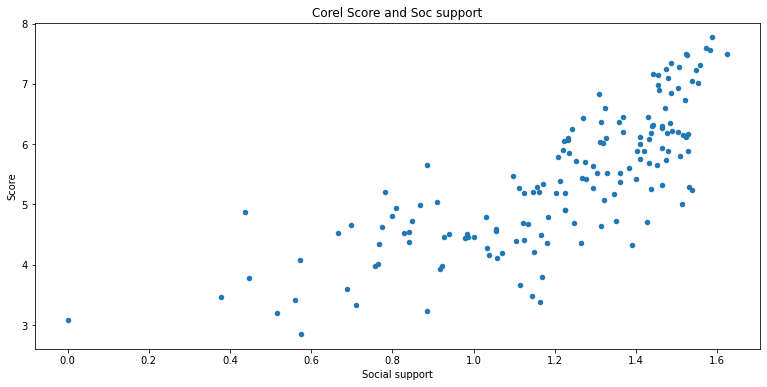

<AxesSubplot:title={'center':'Corel Healthy and Soc support'}, xlabel='Healthy life expectancy', ylabel='Score'>

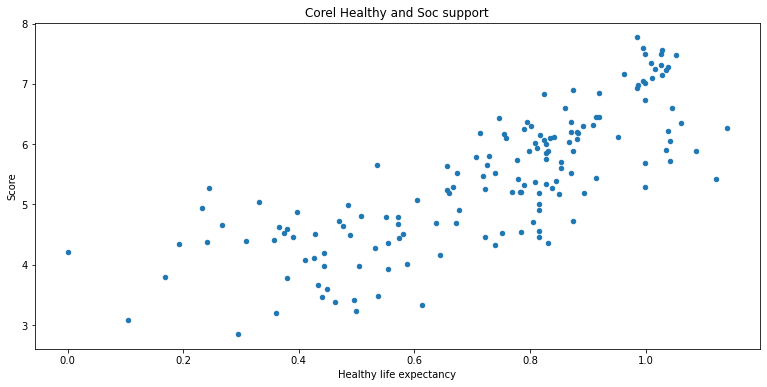

In [81]:
df.plot(kind= 'scatter',
       x= 'Social support',
       y= 'Score',
       title= 'Corel Score and Soc support')
plt.show()
df.plot(kind= 'scatter',
       x='Healthy life expectancy',
       y='Score',
       title= 'Corel Healthy and Soc support')

In [ ]:
по точечным диаграммам видно что чем выше соц уровень и продолжительность жизни, тем выше уровень счастья